In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from tqdm import tqdm
from PIL import Image
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Flatten

Using TensorFlow backend.


In [2]:
#funçao que vai carrega as imagens ( dir = caminho das imagens , resize = resoluçao)
def Dataset_loader(DIR,RESIZE):
    IMG = [] #cria a variavel que vai receber a imagem
    read = lambda imname: np.asarray( Image.open(imname).convert("RGB") )
    for IMAGE_NAME in tqdm(os.listdir(DIR)): #pegando o nome dos arquivos que estao no diretorio 
        PATH = os.path.join(DIR,IMAGE_NAME) #pegando o nome da imagem
        _, ftype = os.path.splitext(PATH)
        #pegando a extençao da imagem ( ob = a funçao esta retornando dois objetos( nome/extençao ) mas so estamos entereçados )
        #na extençao por esse motivo usamos o parameto '-'
        if ftype == ".jpg": #verificando se a extençao da imagem e igual jpg
            img = read(PATH) #nome e extençao da imagem
            img = cv2.resize(img, (RESIZE,RESIZE)) #carrega imagem de acordo com a resoluçao
            IMG.append(np.array(img)/255.) #inseri imagem no vetor
            
    return IMG

In [3]:
#executando a funçao que vai carrega as imagens 
benign_train = np.array( Dataset_loader('dados/train/benign/',64) ) 
malign_train = np.array( Dataset_loader('dados/train/malignant/',64) )
benign_test =  np.array( Dataset_loader('dados/test/benign/',64) )
malign_test =  np.array( Dataset_loader('dados/test/malignant/',64) )

100%|██████████| 300/300 [00:01<00:00, 224.75it/s]


In [4]:
#variavel com a classificaçao das imagens de treino (0 = benign  | malign = 1)
benign_train_label = np.zeros( len( benign_train) ) 
malign_train_label = np.ones( len( malign_train) ) 
benign_test_label = np.zeros( len( benign_test) )   
malign_test_label = np.ones( len( malign_test) )   

In [5]:
#juntando as variaveis de treino e de teste (x = objeto , y = classificaçao)
X_train = np.concatenate(( benign_train, malign_train ), axis = 0)
Y_train = np.concatenate(( benign_train_label, malign_train_label ), axis = 0)
X_test = np.concatenate(( benign_test, malign_test ), axis = 0 )
Y_test = np.concatenate(( benign_test_label, malign_test_label ), axis = 0)

In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(64, 64, 3)))#definindo o numero inicial de partes importantes da imagem e o tamanho das imagem de entrada
model.add(layers.MaxPooling2D((2, 2)))# definido o tamanho do array que vai filtar a imagem (vai reduzi a imagem fazendo uma matriz de [128][128] para um arry de [64][64])

model.add(layers.Conv2D(64, (1, 1), activation='relu')) #definino o numero de pontos da imagem para 64
model.add(layers.MaxPooling2D((1, 1))) #reduzindo a imagem para [64][64]

model.add(layers.Dropout(0.2)) #desligando neuronios da camada de entrada para reduzir o overfilter
model.add(layers.Conv2D(64, (1, 1), activation='relu')) #criando a camada de entrada com os pixeis da imagem

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) #camada oculta da rede neurall
model.add(layers.Dense(64, activation='relu')) #camada oculta da rede neurall
model.add(layers.Dense(1)) #camada de saida
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        4160      
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0

In [8]:
model.compile(optimizer='adam', loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=25, validation_data=(X_test, Y_test))

Train on 2637 samples, validate on 660 samples
Epoch 1/25
2637/2637 [==============================] - 25s 9ms/sample - loss: 0.6743 - accuracy: 0.5787 - val_loss: 0.5099 - val_accuracy: 0.6500
Epoch 2/25
2637/2637 [==============================] - 3s 1ms/sample - loss: 0.4681 - accuracy: 0.7364 - val_loss: 0.4843 - val_accuracy: 0.7909
Epoch 3/25
2637/2637 [==============================] - 2s 585us/sample - loss: 0.4242 - accuracy: 0.7835 - val_loss: 0.3886 - val_accuracy: 0.7909
Epoch 4/25
2637/2637 [==============================] - 2s 653us/sample - loss: 0.4107 - accuracy: 0.7763 - val_loss: 0.3786 - val_accuracy: 0.7758
Epoch 5/25
2637/2637 [==============================] - 1s 548us/sample - loss: 0.3882 - accuracy: 0.7956 - val_loss: 0.3647 - val_accuracy: 0.7864
Epoch 6/25
2637/2637 [==============================] - 2s 644us/sample - loss: 0.3665 - accuracy: 0.7994 - val_loss: 0.3688 - val_accuracy: 0.7621
Epoch 7/25
2637/2637 [==============================] - 2s 608us/sam

In [9]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

660/660 - 0s - loss: 0.5352 - accuracy: 0.8227


In [10]:
acc = history.history

In [11]:
#acc['val_loss']

In [12]:
#acc['val_acc']

In [13]:
predictions = model.predict(X_test)

In [14]:
#predictions.shape

In [15]:
#predictions[40]

In [16]:
#Y_test

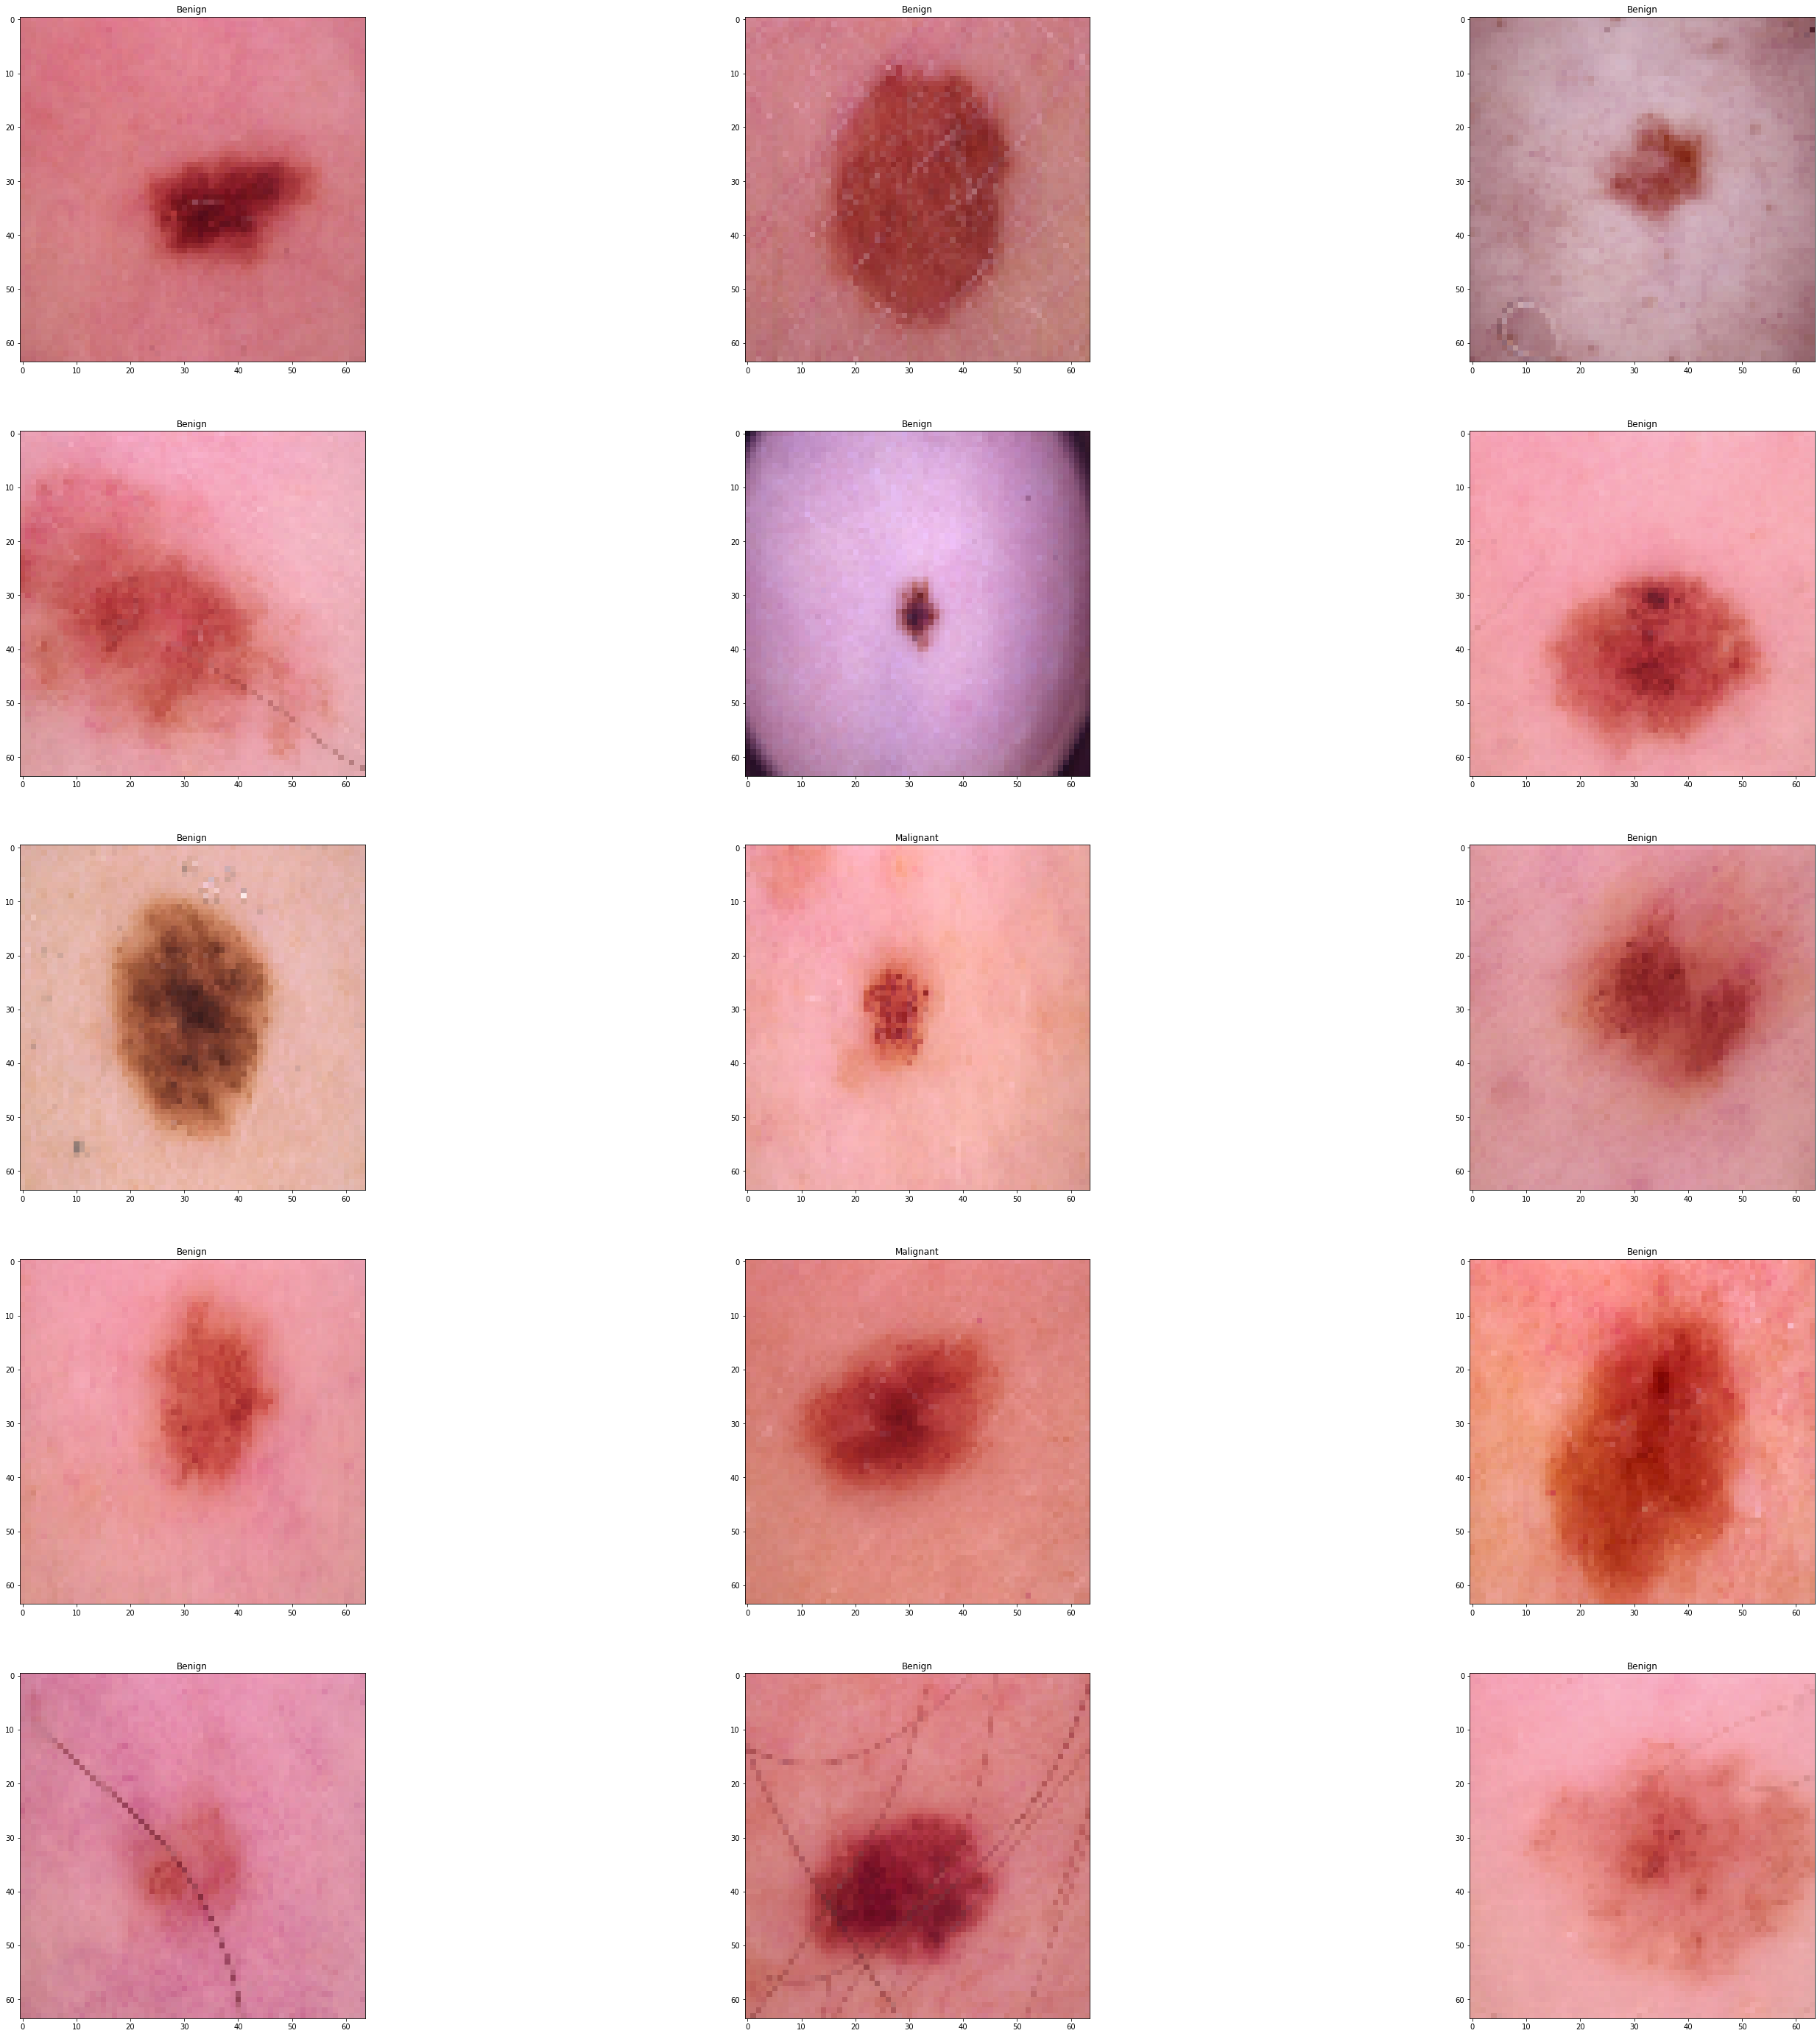

In [17]:
columns = 3
rows = 5
fig=plt.figure(figsize=(50, 50)) #defindo o tamanho da imagem

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i) 
    if predictions[i] < 0: #verificando o grupo da imagem
        ax.title.set_text('Benign') #definindo o titulo da imagem
        plt.imshow(X_train[i], interpolation='nearest') #definindo a imagem
    else:
        ax.title.set_text('Malignant')
        plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [18]:
# model.save('my_model.h5')